In [2]:
from Funciones import cargar_archivos_txt

Archivo df_final_demo.txt cargado correctamente.
Archivo df_final_experiment_clients.txt cargado correctamente.
Archivo df_final_web_data_pt_1.txt cargado correctamente.
Archivo df_final_web_data_pt_2.txt cargado correctamente.


In [3]:
import pandas as pd
import os


# Cargar los archivos de datos demográficos, variación y procesos
demografia = pd.read_csv(os.path.join('data', 'df_final_demo.txt'), delimiter=',')
variacion = pd.read_csv(os.path.join('data', 'df_final_experiment_clients.txt'), delimiter=',')
procesos_pt1 = pd.read_csv(os.path.join('data', 'df_final_web_data_pt_1.txt'), delimiter=',')
procesos_pt2 = pd.read_csv(os.path.join('data', 'df_final_web_data_pt_2.txt'), delimiter=',')

# Concatenar los dos archivos de procesos
procesos = pd.concat([procesos_pt1, procesos_pt2], ignore_index=True)


In [4]:
demografia.dropna()
variacion.dropna()
procesos.dropna()
demografia.head()
variacion.head()
procesos.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [5]:
import numpy as np

variacion['Variation'] = variacion['Variation'].replace('',np.nan)

In [6]:
variacion = variacion.dropna(subset=['Variation'])

In [7]:
# Redondear las edades al número entero más cercano
demografia = demografia.dropna(subset=['clnt_age'])
demografia['clnt_age'] = demografia['clnt_age'].round(0).astype(int)
demografia.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0


In [8]:
procesos['process_step'] = procesos['process_step'].replace('',np.nan)

In [9]:
procesos = procesos.dropna(subset=['process_step'])

Limpieza género

In [10]:
demografia['gendr'] = demografia['gendr'].replace(['U', 'X'], None)
demografia  = demografia.dropna(subset=['gendr'])

In [11]:
# Convertir la columna 'date_time' al formato de fecha
procesos['date_time_original'] = pd.to_datetime(procesos['date_time'])
procesos['date_time'] = pd.to_datetime(procesos['date_time']).dt.strftime('%d/%m/%Y')
procesos.head()

,client_id,visitor_id,visit_id,process_step,date_time,date_time_original
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,17/04/2017,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,17/04/2017,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,17/04/2017,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,17/04/2017,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,17/04/2017,2017-04-17 15:18:04


In [12]:
procesoVariacion = pd.merge(procesos, variacion, on='client_id')
procesoVariacion.head()

,client_id,visitor_id,visit_id,process_step,date_time,date_time_original,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,17/04/2017,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,17/04/2017,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,17/04/2017,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,17/04/2017,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,17/04/2017,2017-04-17 15:18:04,Test


Hipotesis 1

In [13]:
# Crear una columna para indicar si el cliente completó el último paso (confirm)
procesoVariacion['completed'] = procesoVariacion['process_step'].apply(lambda x: 1 if x == 'confirm' else 0)

# Obtener la tasa de finalización por cliente
procesoVariacionCompletado = procesoVariacion.groupby('client_id')['completed'].max().reset_index()

# Unir con la tabla de variaciones (Test/Control) para identificar a qué grupo pertenece cada cliente

tasaCompletado = pd.merge(procesoVariacionCompletado, variacion, on='client_id', how='inner')


completion_rate = tasaCompletado.groupby('Variation')['completed'].mean()

print(completion_rate)

tasaCompletado.to_csv('completion_rate.txt',sep=',', index=False)

Variation
Control    0.655873
Test       0.692932
Name: completed, dtype: float64


tiempo de paso en cada paso

In [14]:
procesoVariacion['date_time_original'] = pd.to_datetime(procesoVariacion['date_time_original'])

procesoVariacion = procesoVariacion.sort_values(by=['client_id', 'date_time_original'])
procesoVariacion['time_diff'] = procesoVariacion.groupby('client_id')['date_time_original'].diff()
# Filtrar pasos que no superen una hora
procesoVariacion_filtrado = procesoVariacion[procesoVariacion['time_diff'] <= pd.Timedelta(hours=1)]
tiempo_por_paso_grupos_filtrado = procesoVariacion_filtrado.groupby(['process_step', 'Variation'])['time_diff'].mean().reset_index()

tiempo_por_paso_grupos_filtrado.to_csv('tiempo_de_paso_filtrado.txt', sep=',', index=False)
print(tiempo_por_paso_grupos_filtrado)



  process_step Variation                 time_diff
0      confirm   Control 0 days 00:02:08.659716430
1      confirm      Test 0 days 00:02:08.796594303
2        start   Control 0 days 00:02:45.351575167
3        start      Test 0 days 00:02:34.480408573
4       step_1   Control 0 days 00:00:43.233850742
5       step_1      Test 0 days 00:00:38.413574332
6       step_2   Control 0 days 00:00:39.111991343
7       step_2      Test 0 days 00:00:48.781717201
8       step_3   Control 0 days 00:01:33.186252966
9       step_3      Test 0 days 00:01:37.249236124


In [15]:
# Convertir time_diff a minutos
procesoVariacion_filtrado['time_diff_minutes'] = procesoVariacion_filtrado['time_diff'].dt.total_seconds() / 60

# Agrupar por process_step y Variation, y sumar los tiempos en minutos
tiempo_por_paso_grupos_sum = procesoVariacion_filtrado.groupby(['process_step', 'Variation'])['time_diff_minutes'].sum().reset_index()

# Convertir la columna a enteros
tiempo_por_paso_grupos_sum['time_diff_minutes'] = tiempo_por_paso_grupos_sum['time_diff_minutes'].astype(int)

# Renombrar la columna para claridad (opcional)
tiempo_por_paso_grupos_sum.rename(columns={'time_diff_minutes': 'total_time_minutes'}, inplace=True)

# Exportar a CSV
tiempo_por_paso_grupos_sum.to_csv('tiempo_de_paso_sum_minutos.txt', sep=',', index=False)

# Mostrar el resultado
print(tiempo_por_paso_grupos_sum)


  process_step Variation  total_time_minutes
0      confirm   Control               35994
1      confirm      Test               48154
2        start   Control               47588
3        start      Test               61503
4       step_1   Control               21260
5       step_1      Test               24723
6       step_2   Control               16868
7       step_2      Test               25178
8       step_3   Control               35339
9       step_3      Test               41906


C:\Users\Casa\AppData\Local\Temp\ipykernel_17492\2716117906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  procesoVariacion_filtrado['time_diff_minutes'] = procesoVariacion_filtrado['time_diff'].dt.total_seconds() / 60


In [27]:
demografia.to_csv('demografia.txt', sep=',', index=False)
variacion.to_csv('variacion.txt', sep=',', index=False)
procesoVariacion.to_csv('procesos.txt', sep=',', index=False)

Análisis de los clientes principales

In [27]:
import pandas as pd

# Filtrar los clientes más activos (más accesos en los últimos 6 meses)
clientes_principales = demografia.sort_values(by='logons_6_mnth', ascending=False)

# Crear los grupos de edad
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']

# Crear la nueva columna con los grupos de edad
clientes_principales['age_group'] = pd.cut(clientes_principales['clnt_age'], bins=bins, labels=labels, right=False)

# Fusionar los DataFrames
df_merged = pd.merge(clientes_principales, variacion, on='client_id', how='left')

# Asignar la columna 'Variation' desde el DataFrame fusionado
# Asegúrate de que 'variation_column' sea el nombre correcto de la columna de variación
df_merged['Variation'] = df_merged['Variation']

df_merged = df_merged.dropna(subset=['Variation'])
# Mostrar los principales clientes con grupos de edad y variación
print(df_merged[['client_id', 'clnt_age', 'age_group', 'clnt_tenure_yr', 'logons_6_mnth', 'gendr', 'Variation']])

# Guardar el archivo con la nueva columna
df_merged.to_csv('clientes_principales_con_grupos_edad3.txt', sep=',', index=False)




       client_id  clnt_age age_group  clnt_tenure_yr  logons_6_mnth gendr  \
0         180404        26     26-35            11.0            9.0     M   
1        8346558        54     46-55            19.0            9.0     M   
2        9463775        52     46-55            14.0            9.0     M   
3        8750508        56     56-65            10.0            9.0     F   
4        5199388        78       65+            13.0            9.0     M   
...          ...       ...       ...             ...            ...   ...   
42596    2456828        62     56-65            15.0            3.0     F   
42597    8228389        52     46-55            15.0            3.0     F   
42598    6784404        42     36-45            20.0            3.0     F   
42599    1730224        57     56-65            12.0            3.0     F   
42600    4940498        64     56-65            16.0            3.0     F   

      Variation  
0       Control  
1       Control  
2          Test  
3  

Análisis de la edad y la antigüedad de los clientes principales

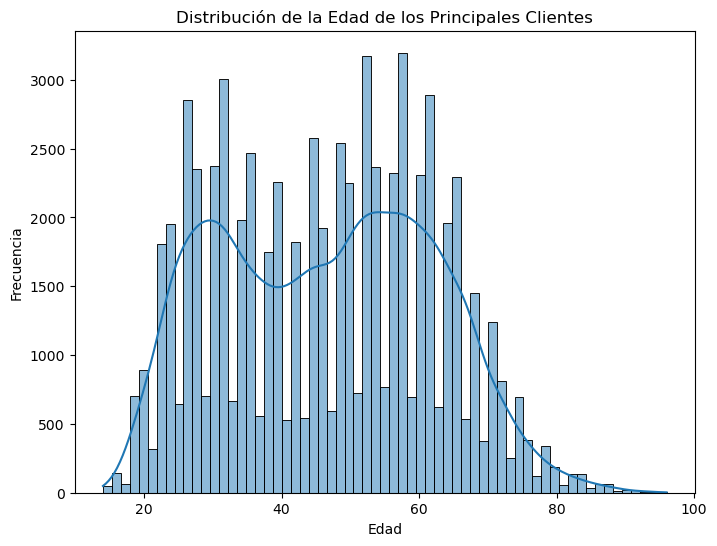

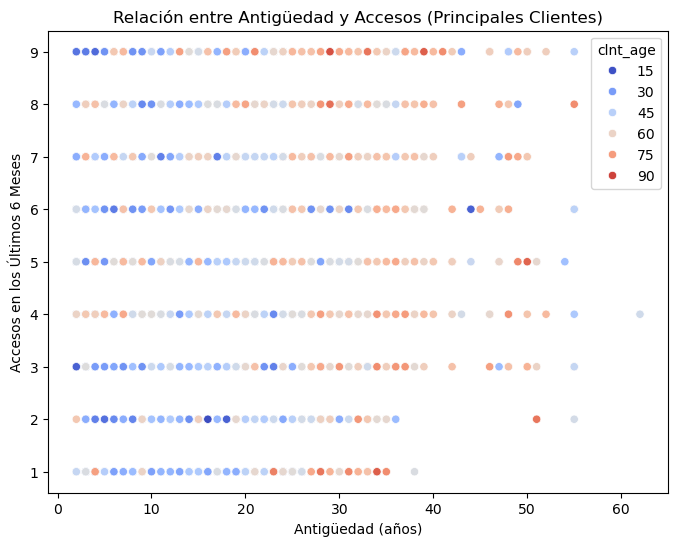

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la edad de los principales clientes
plt.figure(figsize=(8, 6))
sns.histplot(clientes_principales['clnt_age'], kde=True)
plt.title('Distribución de la Edad de los Principales Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre antigüedad y cantidad de accesos
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clientes_principales, x='clnt_tenure_yr', y='logons_6_mnth', hue='clnt_age', palette='coolwarm')
plt.title('Relación entre Antigüedad y Accesos (Principales Clientes)')
plt.xlabel('Antigüedad (años)')
plt.ylabel('Accesos en los Últimos 6 Meses')
plt.show()


Análisis de los procesos

In [24]:
# Verificar los procesos seguidos por los principales clientes
procesos_principales = procesos[procesos['client_id'].isin(clientes_principales['client_id'])]
# Hacer un merge para añadir la columna 'Variation' a procesos_principales
procesos_principales = pd.merge(procesos_principales, clientes_con_variacion[['client_id', 'Variation']], on='client_id', how='left')

# Mostrar el DataFrame actualizado con la columna 'Variation'
print(procesos_principales.head())

print(procesos_principales)


   client_id            visitor_id                      visit_id process_step  \
0    8320017  39393514_33118319366  960651974_70596002104_312201      confirm   
1    8320017  39393514_33118319366  960651974_70596002104_312201       step_3   
2    8320017  39393514_33118319366  960651974_70596002104_312201       step_2   
3    8320017  39393514_33118319366  960651974_70596002104_312201       step_1   
4    8320017  39393514_33118319366  960651974_70596002104_312201        start   

    date_time  date_time_original Variation  
0  05/04/2017 2017-04-05 13:10:05      Test  
1  05/04/2017 2017-04-05 13:09:43      Test  
2  05/04/2017 2017-04-05 13:08:40      Test  
3  05/04/2017 2017-04-05 13:08:24      Test  
4  05/04/2017 2017-04-05 13:08:06      Test  
        client_id             visitor_id                      visit_id  \
0         8320017   39393514_33118319366  960651974_70596002104_312201   
1         8320017   39393514_33118319366  960651974_70596002104_312201   
2         83200

Ver KPI

In [22]:
# Unir los clientes principales con su grupo de variación
clientes_con_variacion = pd.merge(clientes_principales, variacion, on='client_id', how='left')

# Mostrar los clientes con su variación
print(clientes_con_variacion[['client_id', 'clnt_age', 'clnt_tenure_yr', 'logons_6_mnth', 'Variation']])


       client_id  clnt_age  clnt_tenure_yr  logons_6_mnth Variation
0         180404        26            11.0            9.0   Control
1        8346558        54            19.0            9.0   Control
2        9463775        52            14.0            9.0      Test
3        8750508        56            10.0            9.0   Control
4        5199388        78            13.0            9.0      Test
...          ...       ...             ...            ...       ...
46464     881005        50            14.0            1.0       NaN
46465     138242        42            19.0            1.0       NaN
46466    3893415        30            11.0            1.0       NaN
46467    2129267        38            11.0            1.0       NaN
46468    6381963        57            14.0            1.0       NaN

[46469 rows x 5 columns]


In [25]:
# Contar cuántos clientes están en cada grupo (Test y Control)
kpi_variacion = clientes_con_variacion['Variation'].value_counts()

kpi_procesosgrupo = procesos_principales.groupby(['Variation', 'process_step'])['client_id'].unique()

# Contar cuántos de los clientes principales llegaron a cada paso del proceso
kpi_procesos = procesos_principales.groupby('process_step')['client_id'].nunique()


# Mostrar los KPI
print("Número de clientes en cada variación (Test vs Control):")
print(kpi_variacion)
kpi_variacion.to_csv('Kpivariacion.txt', sep=',', index=False)

print("\nNúmero de clientes que completaron cada paso del proceso:")
print(kpi_procesos)
kpi_procesos.to_csv('Kpiprocesos.txt', sep=',', index=False)

print("Clientes en cada variación (Test vs Control) y cada paso del proceso:")
print(kpi_procesosgrupo)
kpi_procesosgrupo.to_csv('Kpiprocesosgrupo.txt', sep=',', index=False)


Número de clientes en cada variación (Test vs Control):
Variation
Test       17693
Control    15512
Name: count, dtype: int64

Número de clientes que completaron cada paso del proceso:
process_step
confirm    31177
start      46015
step_1     40777
step_2     37228
step_3     35006
Name: client_id, dtype: int64
Clientes en cada variación (Test vs Control) y cada paso del proceso:
Variation  process_step
Control    confirm         [4033851, 6651403, 9814849, 4446011, 4229407, ...
           start           [4033851, 6651403, 9814849, 4446011, 4229407, ...
           step_1          [4033851, 6651403, 9814849, 4446011, 4229407, ...
           step_2          [4033851, 6651403, 9814849, 4446011, 2842481, ...
           step_3          [4033851, 6651403, 9814849, 4446011, 2842481, ...
Test       confirm         [8320017, 3170143, 2519971, 5407849, 5308474, ...
           start           [8320017, 9466803, 3170143, 438567, 5407849, 5...
           step_1          [8320017, 9466803, 3170143,

In [26]:
kpi_variacion.head()


Variation
Test       17693
Control    15512
Name: count, dtype: int64

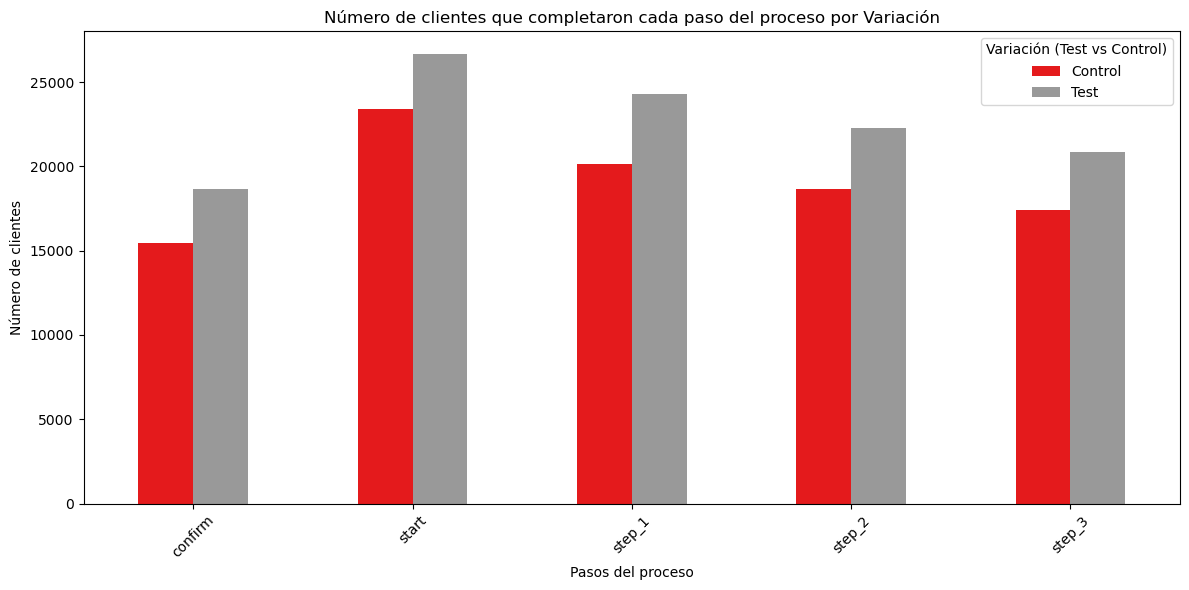

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por 'process_step' y 'Variation', y contar el número de clientes únicos
kpi_procesosgrupo = procesos_principales.groupby(['process_step', 'Variation'])['client_id'].nunique().unstack()

# Crear el gráfico de barras
kpi_procesosgrupo.plot(kind='bar', figsize=(12, 6), colormap='Set1')

# Añadir etiquetas y título
plt.title("Número de clientes que completaron cada paso del proceso por Variación")
plt.xlabel("Pasos del proceso")
plt.ylabel("Número de clientes")
plt.legend(title="Variación (Test vs Control)", loc='upper right')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


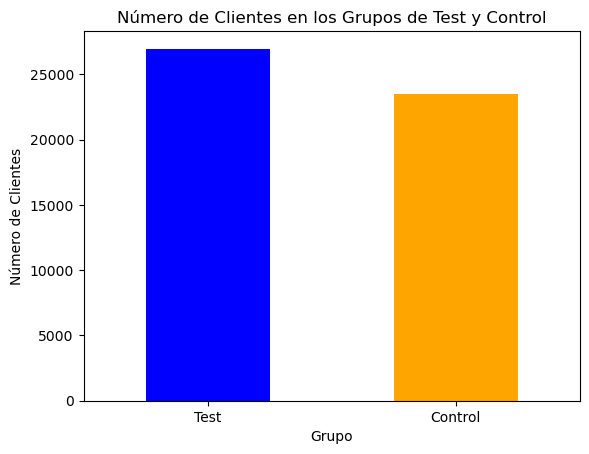

In [12]:
import matplotlib.pyplot as plt

# Gráfico de barras de clientes en los grupos de Test y Control
kpi_variacion.plot(kind='bar', color=['blue', 'orange'])
plt.title('Número de Clientes en los Grupos de Test y Control')
plt.xlabel('Grupo')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()


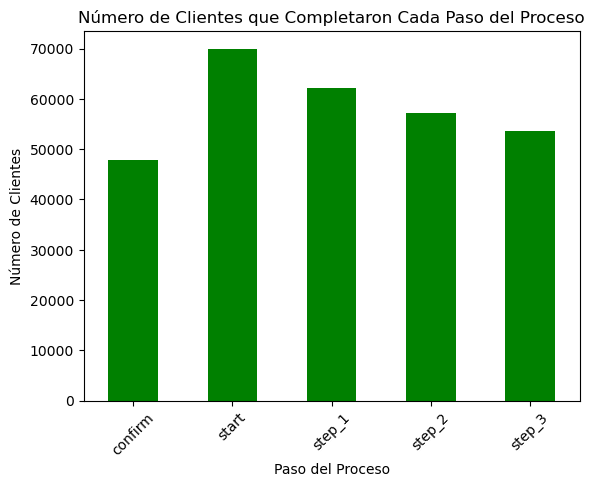

In [13]:
# Gráfico de barras para los pasos del proceso
kpi_procesos.plot(kind='bar', color='green')
plt.title('Número de Clientes que Completaron Cada Paso del Proceso')
plt.xlabel('Paso del Proceso')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()


In [15]:
from scipy import stats
# Asegurarte de que 'client_id' está presente en ambos dataframes
finalizacion_proceso = pd.merge(procesos, variacion, on='client_id', how='inner')

# Filtramos solo las filas que representan el paso final del proceso (por ejemplo, 'confirm')
finalizacion_proceso = finalizacion_proceso[finalizacion_proceso['process_step'] == 'confirm']


# Contar el número de clientes que completaron el proceso en cada grupo
completaron_control = finalizacion_proceso[finalizacion_proceso['Variation'] == 'Control']['client_id'].nunique()
completaron_test = finalizacion_proceso[finalizacion_proceso['Variation'] == 'Test']['client_id'].nunique()

# Número total de clientes en cada grupo
total_control = clientes_con_variacion[clientes_con_variacion['Variation'] == 'Control']['client_id'].nunique()
total_test = clientes_con_variacion[clientes_con_variacion['Variation'] == 'Test']['client_id'].nunique()

# Calcular las tasas de finalización
tasa_control = completaron_control / total_control
tasa_test = completaron_test / total_test

# Prueba de proporciones (Chi-cuadrado)
proporcion_test = [completaron_test, total_test - completaron_test]
proporcion_control = [completaron_control, total_control - completaron_control]
chi2, p_valor = stats.chi2_contingency([proporcion_test, proporcion_control])[:2]

# Mostrar los resultados
print(f"Tasa de finalización - Control: {tasa_control:.2%}, Test: {tasa_test:.2%}")
print(f"Chi-cuadrado: {chi2:.4f}, P-valor: {p_valor:.4f}")


Tasa de finalización - Control: 65.59%, Test: 69.29%
Chi-cuadrado: 78.5880, P-valor: 0.0000


Hipotesis 1

In [20]:
from statsmodels.stats.proportion import proportions_ztest

# Contar clientes que completaron el proceso en cada grupo
completaron_control = len(procesos_principales[(procesos_principales['Variation'] == 'Control') & 
                                               (procesos_principales['process_step'] == 'confirm')])
completaron_test = len(procesos_principales[(procesos_principales['Variation'] == 'Test') & 
                                            (procesos_principales['process_step'] == 'confirm')])

# Total de clientes en cada grupo
total_control = len(procesos_principales[procesos_principales['Variation'] == 'Control'])
total_test = len(procesos_principales[procesos_principales['Variation'] == 'Test'])

# Datos para la prueba de proporciones
counts = [completaron_control, completaron_test]
nobs = [total_control, total_test]

# Realizar la prueba Z de dos proporciones
stat, p_value = proportions_ztest(counts, nobs)

print(f"Estadístico Z: {stat}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Conclusión: Hay una diferencia significativa en las tasas de finalización entre el Grupo de Control y el Grupo de Prueba.")
else:
    print("Conclusión: No hay una diferencia significativa en las tasas de finalización entre el Grupo de Control y el Grupo de Prueba.")


Estadístico Z: -18.684265189201895
Valor p: 6.648804537633198e-78
Conclusión: Hay una diferencia significativa en las tasas de finalización entre el Grupo de Control y el Grupo de Prueba.


Hipotesis 2 

In [33]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Crear una columna indicando si completaron el proceso (convertir a 0 o 1)
procesos_principales['completed'] = np.where(procesos_principales['process_step'] == 'confirm', 1, 0)

# Seleccionar las variables de interés
X = clientes_con_variacion[['clnt_tenure_yr', 'Variation']]

# Convertir la variable "Variation" a variables dummies y asegurar que los tipos sean numéricos
X = pd.get_dummies(X, drop_first=True)
X = X.apply(pd.to_numeric, errors='coerce')  # Convertir todos los datos a numéricos

# Convertir cualquier columna booleana a enteros
X = X.astype(int)

# Asegurarse de que 'y' sea numérico
y = procesos_principales['completed'].astype(int)

# Revisar los tipos de datos en X y y
print("Tipos de datos en X:", X.dtypes)
print("Tipos de datos en y:", y.dtypes)

# Verificar si hay valores no numéricos o nulos en X o y
print("Valores nulos en X:", X.isnull().sum())
print("Valores nulos en y:", y.isnull().sum())

# Eliminar filas con valores nulos en X o y
X = X.dropna()
y = y.loc[X.index]  # Asegurarse de que y tenga los mismos índices que X

# Verificar que no haya valores infinitos en X
if not X.applymap(np.isfinite).all().all():
    raise ValueError("X contiene valores infinitos o NaNs")

# Convertir X a un array NumPy para evitar posibles problemas con los índices
X = np.asarray(X)
y = np.asarray(y)

# Añadir constante para la regresión
X = sm.add_constant(X)

# Ajustar el modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Mostrar los resultados del modelo
# Mostrar los resultados del modelo
# Mostrar los resultados del modelo
print(result.summary())

# Imprimir los nombres de las variables en el modelo
print("Nombres de las variables en el modelo:", result.model.exog_names)

# Buscar el nombre correcto de 'clnt_tenure_yr'
if 'clnt_tenure_yr' in result.model.exog_names:
    p_value_tenure = result.pvalues[result.model.exog_names.index('clnt_tenure_yr')]
    if p_value_tenure < 0.05:
        print("Conclusión: La antigüedad del cliente tiene un efecto significativo en la tasa de finalización.")
    else:
        print("Conclusión: La antigüedad del cliente no tiene un efecto significativo en la tasa de finalización.")
else:
    print("El nombre 'clnt_tenure_yr' no se encuentra en el modelo. Revisa los nombres de las variables.")




Tipos de datos en X: clnt_tenure_yr    int32
Variation_Test    int32
dtype: object
Tipos de datos en y: int32
Valores nulos en X: clnt_tenure_yr    0
Variation_Test    0
dtype: int64
Valores nulos en y: 0
Optimization terminated successfully.
         Current function value: 0.391029
         Iterations 6


C:\Users\Casa\AppData\Local\Temp\ipykernel_29892\349619865.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not X.applymap(np.isfinite).all().all():


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                70594
Model:                          Logit   Df Residuals:                    70591
Method:                           MLE   Df Model:                            2
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:               2.720e-05
Time:                        11:24:00   Log-Likelihood:                -27604.
converged:                       True   LL-Null:                       -27605.
Covariance Type:            nonrobust   LLR p-value:                    0.4720
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8692      0.024    -77.466      0.000      -1.917      -1.822
x1            -0.0014      0.002     -0.893      0.372      -0.005       0.002
x2             0.0190      0.023      0.831      0.4

Hipotesis 3 

In [38]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Crear una columna indicando si el cliente tiene alta frecuencia de inicio de sesión (por encima de la media)
clientes_con_variacion['high_logons'] = clientes_con_variacion['logons_6_mnth'] > clientes_con_variacion['logons_6_mnth'].mean()

# Seleccionar las variables de interés (interacción entre 'Variation' y 'high_logons')
X = clientes_con_variacion[['high_logons', 'Variation']]

# Convertir a dummies y asegurarse de que los tipos sean numéricos
X = pd.get_dummies(X, drop_first=True)

# Convertir booleanos a enteros
X['high_logons'] = X['high_logons'].astype(int)
X['Variation_Test'] = X['Variation_Test'].astype(int)

# Asegurarse de que los datos sean numéricos
X = X.apply(pd.to_numeric, errors='coerce')  # Convertir todos los datos a numéricos

# Verificar y eliminar filas con valores nulos o no finitos en X
X = X.dropna()  # Eliminar filas con NaN
X = X[np.isfinite(X).all(axis=1)]  # Eliminar filas con valores infinitos

# Imprimir el resumen de X después de la limpieza
print("\nResumen de X después de la limpieza:")
print(X.head())
print("\nTipos de datos en X después de la limpieza:")
print(X.dtypes)

# Asegurarse de que 'y' sea numérico y esté alineado con X
y = procesos_principales['completed'].astype(int)
y = y.loc[X.index]  # Asegurarse de que y tenga los mismos índices que X

# Comprobar si hay valores nulos en y
if y.isnull().any():
    raise ValueError("y contiene valores nulos después de la alineación con X")

# Revisar tipos de datos en y
print("Tipos de datos en y:", y.dtypes)

# Convertir X a un array NumPy
X = sm.add_constant(X)
X = np.asarray(X)
y = np.asarray(y)

# Ajustar el modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Mostrar los resultados del modelo
print(result.summary())

# Interpretar los p-valores
p_value_interaction = result.pvalues['interaction']
if p_value_interaction < 0.05:
    print("Conclusión: La nueva interfaz es más efectiva para clientes con alta frecuencia de inicio de sesión.")
else:
    print("Conclusión: No se encontró una diferencia significativa basada en la frecuencia de inicio de sesión.")



Resumen de X después de la limpieza:
   high_logons  Variation_Test
0            1               1
1            1               1
2            1               0
3            1               0
4            1               1

Tipos de datos en X después de la limpieza:
high_logons       int32
Variation_Test    int32
dtype: object
Tipos de datos en y: int32
Optimization terminated successfully.
         Current function value: 0.391032
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                70594
Model:                          Logit   Df Residuals:                    70591
Method:                           MLE   Df Model:                            2
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:               1.991e-05
Time:                        11:38:24   Log-Likelihood:                -27605.
converged:                       True   LL-Null:                  

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices